In [1]:
#!pip install websocket-client

In [2]:
from fastai.vision.all import *
from fastai.test_utils import VerboseCallback

from callbacks.websocket_logger import WebsocketLogger

In [3]:
mnist_db = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                  splitter= RandomSplitter(),
                  get_items=get_image_files,
                  get_y=parent_label)

In [4]:
dls = mnist_db.dataloaders(untar_data(URLs.MNIST), bs=128)

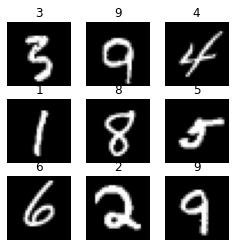

In [5]:
dls.show_batch(max_n=9, figsize=(4,4))

In [6]:
class SimpleModel(nn.Module):
    
    def __init__(self):
        super(SimpleModel, self).__init__()
        
        self.con = nn.Conv2d(3, 64, kernel_size=(3,3), stride = (2, 2), padding=(1,1), bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        
        self.pool = nn.AvgPool2d(kernel_size=5, stride=3, padding=1)
        self.flat = nn.Flatten()
        
        self.bn2 = nn.BatchNorm1d(1024)
        self.drop = nn.Dropout(p=0.5)
        self.lin = nn.Linear(in_features=1024, out_features=10, bias=False)
        
    
    def forward(self, x):
        x = self.con(x)
        x = self.relu(self.bn1(x))
        
        x = self.pool(x)
        x = self.flat(x)
        
        x = self.bn2(x)
        x = self.drop(x)
        x = self.lin(x)
        
        return x


In [7]:

#learn = Learner(dls, SimpleModel(), metrics=[accuracy, Recall(average='macro')]) #, Precision(average='macro')
#to(memory_format=torch.channels_last) #issue54404

In [8]:
#learn.fit(3, lr=1e-3, cbs=[ShowGraphCallback(), WebsocketLogger('ws://maichine:8555/ws/watchtrain/producer/99879')])

Connecting websocket ...
... websocket connected.
Training id : 2


epoch,train_loss,valid_loss,accuracy,recall_score,precision_score,time
0,0.159610,0.302595,0.922000,0.919122,0.928771,00:30
1,0.133791,0.176589,0.955000,0.952974,0.958927,00:29
2,0.086569,0.103169,0.975286,0.975132,0.975756,00:30
3,0.064713,0.092172,0.977571,0.977215,0.978720,00:30
4,0.046407,0.041592,0.987500,0.987323,0.987549,00:29
5,0.033994,0.034147,0.990000,0.989724,0.990009,00:29
6,0.016905,0.027259,0.992571,0.992547,0.992439,00:29
7,0.010201,0.023838,0.994214,0.994226,0.994114,00:30
8,0.005025,0.021908,0.994714,0.994651,0.994654,00:29
9,0.004602,0.022827,0.994929,0.994876,0.994871,00:29


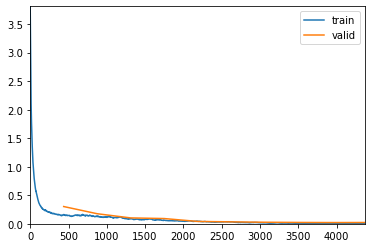

In [15]:
learn = cnn_learner(dls, resnet18, pretrained = False, metrics=[accuracy, Recall(average='macro'), Precision(average='macro')]) #, Precision(average='macro')

learn.unfreeze
learn.fit_one_cycle(10, lr_max = 5e-3, cbs=[ShowGraphCallback(), WebsocketLogger('ws://maichine:8555/ws/watchtrain/producer/99879')])

#### 